# 🌺 Iris Data Analysis

## _Machine Learning Models Evaluation_

**Author:** Gerley Adriano Miranda Cruz

### Dataset

The dataset used in this project is the [Iris Flower Dataset](https://archive.ics.uci.edu/ml/datasets/iris). It contains 150 samples of three different species of Iris flowers (Iris setosa, Iris virginica and Iris versicolor). Each sample contains the sepal and petal length and width. The dataset is available in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).

### Problem Statement

The goal of this project is to evaluate the performance of different machine learning models in the Iris Flower Dataset. The models used are:

- Decision Trees
- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machines
- Random Forests
- K-Means
- Hierarchical Clustering

### Solution Statement

The solution consists in training the models using the Iris Flower Dataset and evaluating their performance using the accuracy metric. The accuracy is the ratio between the number of correct predictions and the total number of predictions. The model with the highest accuracy is the one that best fits the dataset.

### Benchmark Model

The benchmark model is the Logistic Regression. It is a simple model that is easy to implement and interpret. It is also a good model to start with when solving a classification problem.

### Evaluation Metrics

The evaluation metric used in this project is the accuracy. It is the ratio between the number of correct predictions and the total number of predictions. The accuracy is a good metric to evaluate the performance of a classification model.


In [100]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.tree import DecisionTreeClassifier # to apply the Decision tree algorithm
from sklearn.metrics import accuracy_score, classification_report # to check the accuracy
from sklearn import tree # to plot the tree
import matplotlib.pyplot as plt # to plot the graph
import seaborn as sns # for intractive graphs
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression algorithm
from sklearn.neighbors import KNeighborsClassifier # to apply the KNN algorithm
from sklearn.metrics import confusion_matrix # to create confusion matrix
from sklearn.svm import SVC # to apply the SVM algorithm
from sklearn.cluster import KMeans, AgglomerativeClustering # to apply the KMeans algorithm
import scipy.cluster.hierarchy as sch # to apply the Dendrogram


In [11]:
# Load the dataset and print the shape
iris_data = pd.read_csv('input/iris.csv')

print("Dataset Iris:" + str(iris_data.shape))

Dataset Iris:(150, 6)


In [12]:
# Print the features of the dataset
print("Features: " + str(iris_data.columns))

Features: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [13]:
# Split the dataset into train and test
X = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values

In [14]:
# Define the train and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🌳 1. Decision Tree Classifier

The decision tree classifier is a supervised learning algorithm that is used for classification problems. It is a tree-like model that is built by splitting the dataset into subsets based on an attribute value test. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Read more about the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html).

In [15]:
# Define the classifier
clf_decision_tree = DecisionTreeClassifier()

# Fit the model to the training data
clf_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# Predict the test data
y_pred = clf_decision_tree.predict(X_test)

In [17]:
# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [18]:
# Show the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



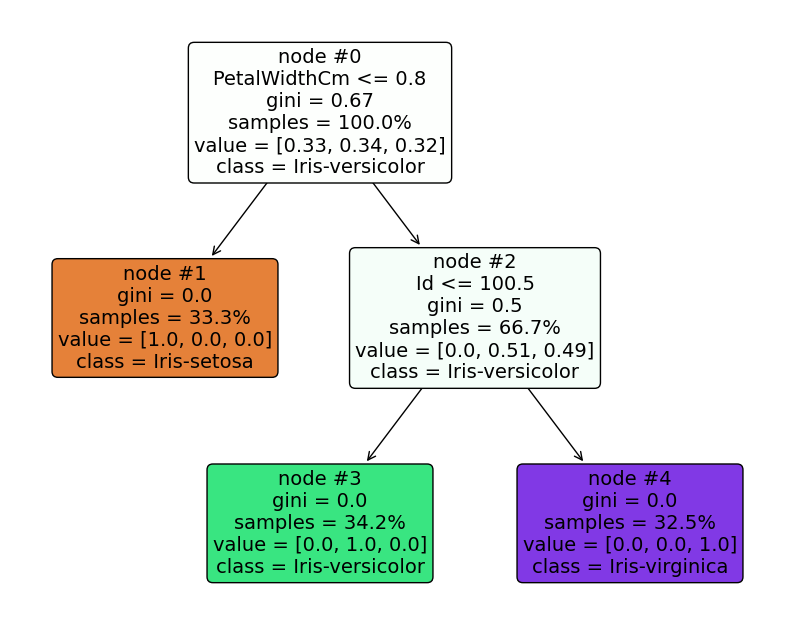

In [19]:
# Show the tree decision plot
plt.figure(figsize=(10, 8))
tree.plot_tree(clf_decision_tree, feature_names=iris_data.columns[:-1], class_names=np.unique(y), filled=True,
               rounded=True, fontsize=14, precision=2, proportion=True, node_ids=True, impurity=True)
plt.show()

### 🗿 2. Logistic Regression

The logistic regression is a supervised learning algorithm that is used for classification problems. It is a simple model that is easy to implement and interpret. It is also a good model to start with when solving a classification problem.

Read more about the [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


In [20]:
# Define the logistic regression classifier and set the maximum number of iterations to 1000
clf_logistic_regression = LogisticRegression(max_iter=1000)

# Fit the model to the training data
clf_logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
# Make predictions on the test data
y_pred_logistic_regression = clf_decision_tree.predict(X_test)

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic_regression)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [23]:
# Show the classification report for the logistc regression
classification_rep = classification_report(y_test, y_pred_logistic_regression)
print("Classification Report:\n", classification_rep)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### 2.1 Predicted Probabilities

The predicted probabilities are the probabilities that the model assigns to each class. The predicted probabilities are used to calculate the predicted class.

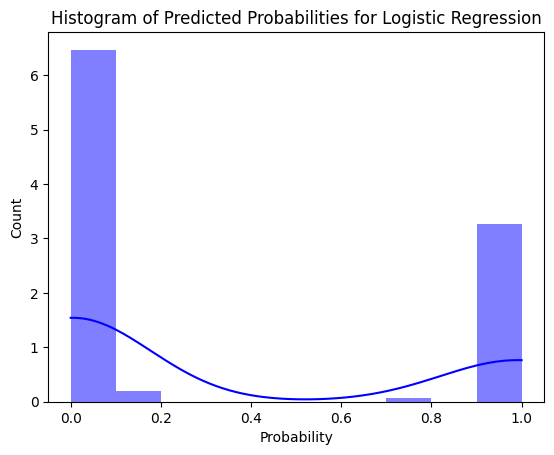

In [24]:
# Get the probabilities for each class
probs = clf_logistic_regression.predict_proba(X)
probs = probs[:, 1]  # Keep probabilities of the positive class only

sns.histplot(probs, bins=10, kde=True, stat='density', linewidth=0, alpha=0.5, color='blue',
             label='Predicted probabilities', element='step', fill=True, cumulative=False, common_norm=False)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.title('Histogram of Predicted Probabilities for Logistic Regression')
plt.show()

#### 2.2 Coefficients

The coefficients are the weights that the model assigns to each feature. The coefficients are used to calculate the predicted probabilities. In logistic regression, the coefficients are the log odds of the target variable. The log odds are the logarithm of the odds. The odds are the ratio between the probability of an event and the probability of not occurring. The log odds are the logarithm of the odds.

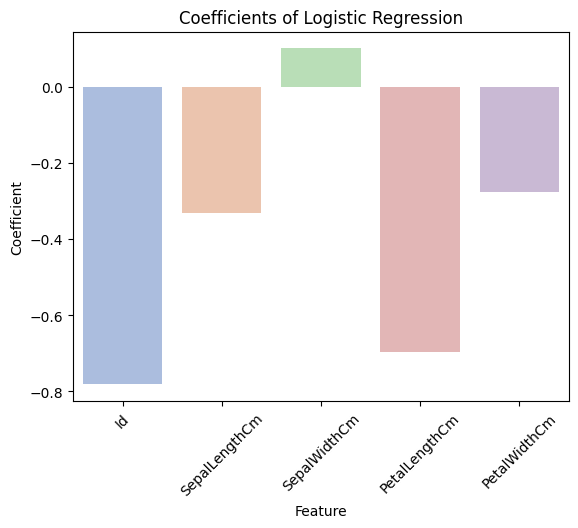

In [25]:
# Get the coefficients of the logistic regression
coeficients = clf_logistic_regression.coef_[0]

# Plot the coefficients using seaborn
sns.barplot(x=iris_data.columns[:-1], y=coeficients, alpha=0.5, palette='muted')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Coefficients of Logistic Regression')
plt.xticks(rotation=45)
plt.show()

### 📚 3. K-Nearest Neighbors

The K-Nearest Neighbors is a supervised learning algorithm that is used for classification problems. It is a simple model that is easy to implement and interpret. It is also a good model to start with when solving a classification problem. The Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

Read more about the [K-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [26]:
# Define the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred_knn = knn.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 1.0


#### 3.1 Confusion Matrix

The confusion matrix is a table that is used to evaluate the performance of a classification model. For the KNN model, the confusion matrix is a table that contains the number of true positives, false positives, true negatives and false negatives.

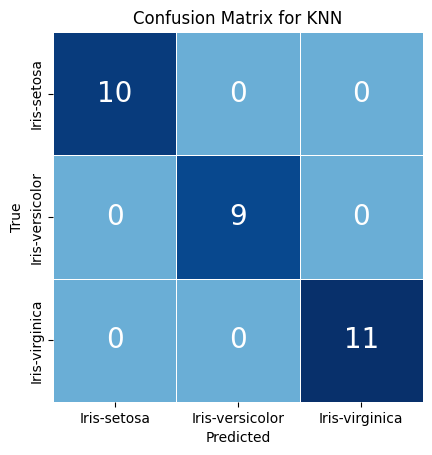

In [29]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 20}, xticklabels=np.unique(y), yticklabels=np.unique(y), square=True, robust=True, linewidths=0.5,
            center=0, vmin=0, vmax=cm.max())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')
plt.show()

### 📈 4. Support Vector Machines

The Support Vector Machines is a supervised learning algorithm that is used for classification problems. It is a simple model that is easy to implement and interpret. It is also a good model to start with when solving a classification problem.

Read more about the [Support Vector Machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [31]:
# Define the SVM classifier
clf_svm = SVC()

# Fit the model to the training data
clf_svm.fit(X_train, y_train)

SVC()

In [32]:
# Make predictions on the test data
y_pred_svm = clf_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [33]:
# Show the classification report for the SVM
classification_rep = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", classification_rep)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### 4.1 Heatmap of support vectors

The heatmap of support vectors is a plot that shows the support vectors of the model. The support vectors are the data points that are closest to the decision boundary. The heatmap of support vectors is a good way to visualize the decision boundary of the model.

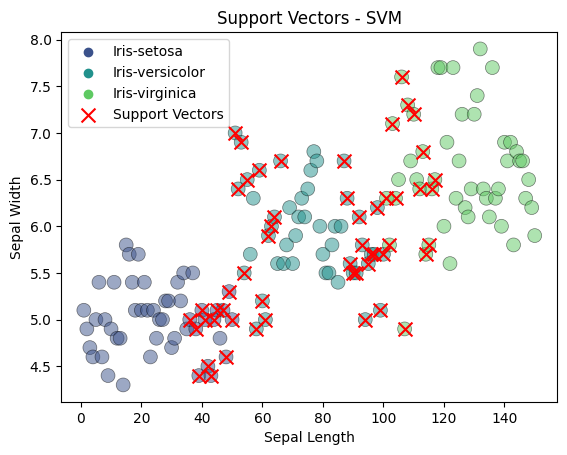

In [50]:
support_vectors = clf_svm.support_vectors_

# Plot the support vectors
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', alpha=0.5, s=100, edgecolor='k', linewidth=0.5, legend='full')
sns.scatterplot(x=support_vectors[:, 0], y=support_vectors[:, 1], color='red', marker='x', s=100, linewidth=1.5, legend='full', label='Support Vectors')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Support Vectors - SVM')
plt.show()

#### 4.2 SVM Boundary

The SVM boundary is the decision boundary of the model. It is a line that separates the data points into two classes. The SVM boundary is a good way to visualize the decision boundary of the model.

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

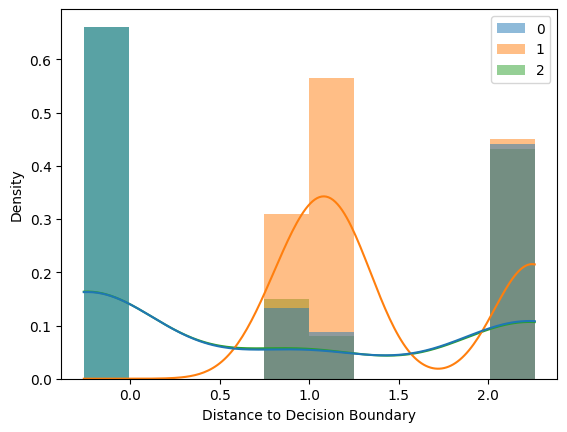

In [55]:
distances = clf_svm.decision_function(X)

# Plot the boundary distances
sns.histplot(distances, bins=10, kde=True, stat='density', linewidth=0, alpha=0.5, color='blue')
plt.xlabel('Distance to Decision Boundary')
plt.ylabel

### ♨️ 5. K-means

The K-means is a clustering algorithm that is used for unsupervised learning. It is a simple model that is easy to implement and interpret. It is also a good model to start with when solving a clustering problem. The clusters are the groups of data points that are close to each other. The centroids are the centers of the clusters. The K-means algorithm is an iterative algorithm that starts with a random set of centroids and then iteratively moves the centroids to minimize the distance between the data points and the centroids.

Read more about the [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [65]:
# Define the KMeans classifier
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Fit the model to the training data
kmeans.fit(X_train, y_train)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [67]:
# Make predictions on the test data
labels = kmeans.labels_

print(labels)

[0 0 2 0 0 1 0 0 0 0 1 2 2 0 0 2 1 1 2 1 2 1 2 0 1 2 0 0 0 2 1 0 0 0 2 0 2
 1 0 2 1 0 1 2 2 2 1 0 0 2 1 0 0 2 2 0 1 0 0 2 2 1 2 1 1 2 0 0 1 1 0 0 0 2
 1 0 1 2 0 2 0 1 0 1 0 1 2 1 2 2 2 0 2 2 0 2 1 1 0 2 1 1 0 1 0 0 1 2 2 1 2
 2 1 1 0 2 1 0 2 2]


In [68]:
# Get the centroids
centroids = kmeans.cluster_centers_
print(centroids)

[[ 28.33333333   5.15333333   3.38222222   1.79555556   0.37555556]
 [127.62857143   6.55142857   2.96571429   5.50571429   1.99142857]
 [ 82.25         5.8975       2.7725       4.345        1.3825    ]]


#### 5.1 Elbow Method

The elbow method is a method that is used to find the optimal number of clusters. It is a good way to find the optimal number of clusters.

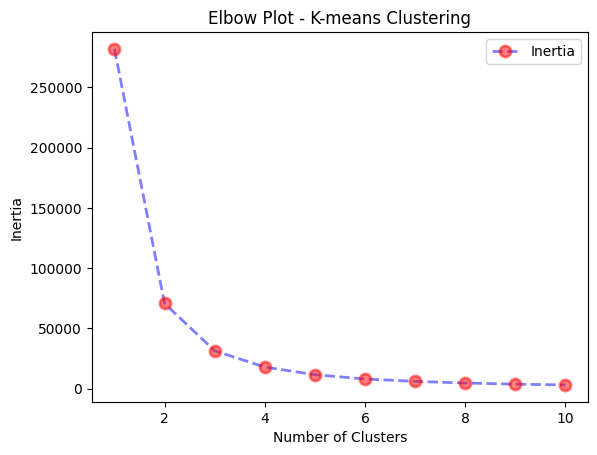

In [83]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
sns.lineplot(x=range(1, 11), y=inertia, marker='o', color='blue', linewidth=2, markersize=8,
             markerfacecolor='red', markeredgecolor='red', markeredgewidth=2, linestyle='--', alpha=0.5, label='Inertia', legend='full')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot - K-means Clustering')
plt.show()

### ⚓ 6. Hierarchical Clustering

The Hierarchical Clustering is a clustering algorithm that is used for unsupervised learning. It is a simple model that is easy to implement and interpret. It is also a good model to start with when solving a clustering problem. The clusters are the groups of data points that are close to each other. The dendrogram is a tree-like structure that shows the hierarchical relationship between the clusters. The Hierarchical Clustering algorithm is an iterative algorithm that starts with a random set of clusters and then iteratively merges the clusters to minimize the distance between the clusters.

Read more about the [Hierarchical Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

In [97]:
# Define the Agglomerative Clustering classifier
hc = AgglomerativeClustering(n_clusters=3)
hc.fit(X_train)

AgglomerativeClustering(n_clusters=3)

In [98]:
# Make predictions on the test data
y_pred_hierarchical_clustering = hc.fit_predict(X_test)

# Evaluate the clustering performance
accuracy = accuracy_score(y_test, y_pred_hierarchical_clustering)
print("Accuracy:", accuracy)

Accuracy: 0.0


#### 6.1 Dendrogram

The dendrogram is a tree-like structure that shows the hierarchical relationship between the clusters. The dendrogram is a good way to visualize the hierarchical relationship between the clusters.

Read more about the [Dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

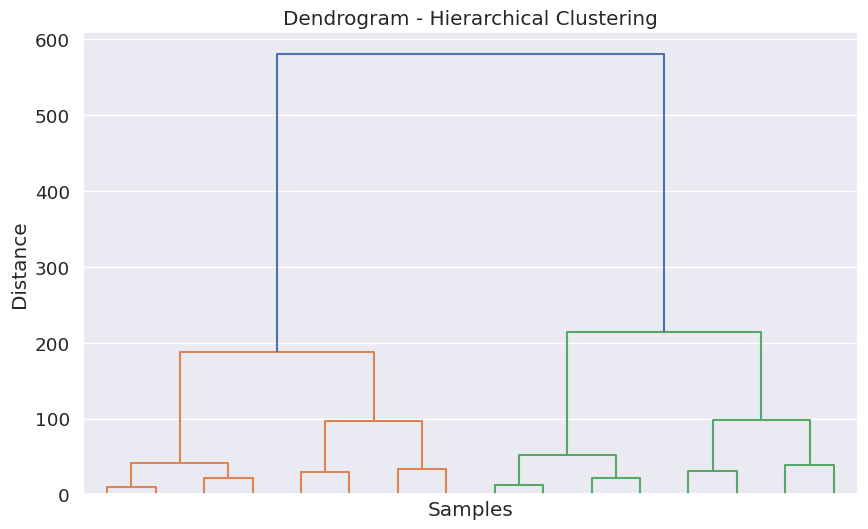

In [104]:
# Compute and plot the Dendrogram
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
dendrogram = sch.dendrogram(sch.linkage(X_train, method='ward', metric='euclidean', optimal_ordering=False), truncate_mode='level', p=3, no_labels=True)
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
